<a href="https://colab.research.google.com/github/Alfonso40-COL/quantum-microgrid-optimization-qaoa/blob/main/FIGURA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generando Figura 4: Comparación de Rendimiento con Métodos Clásicos...


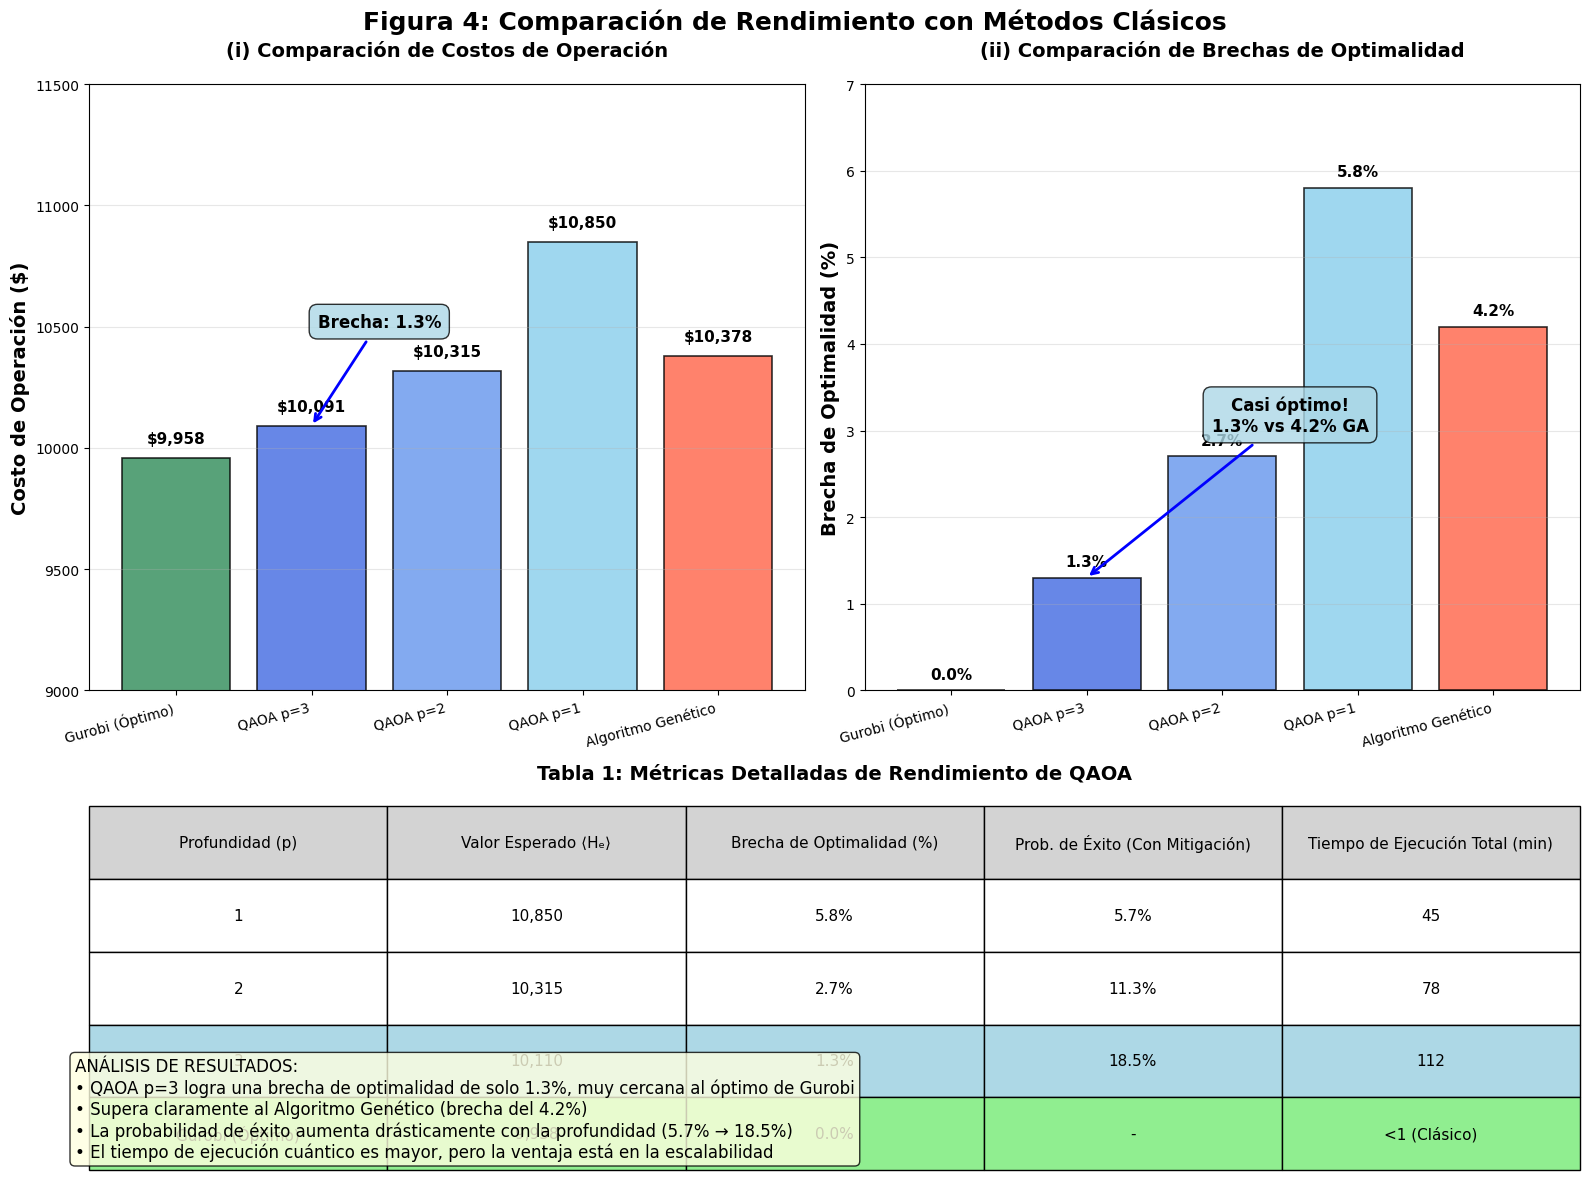

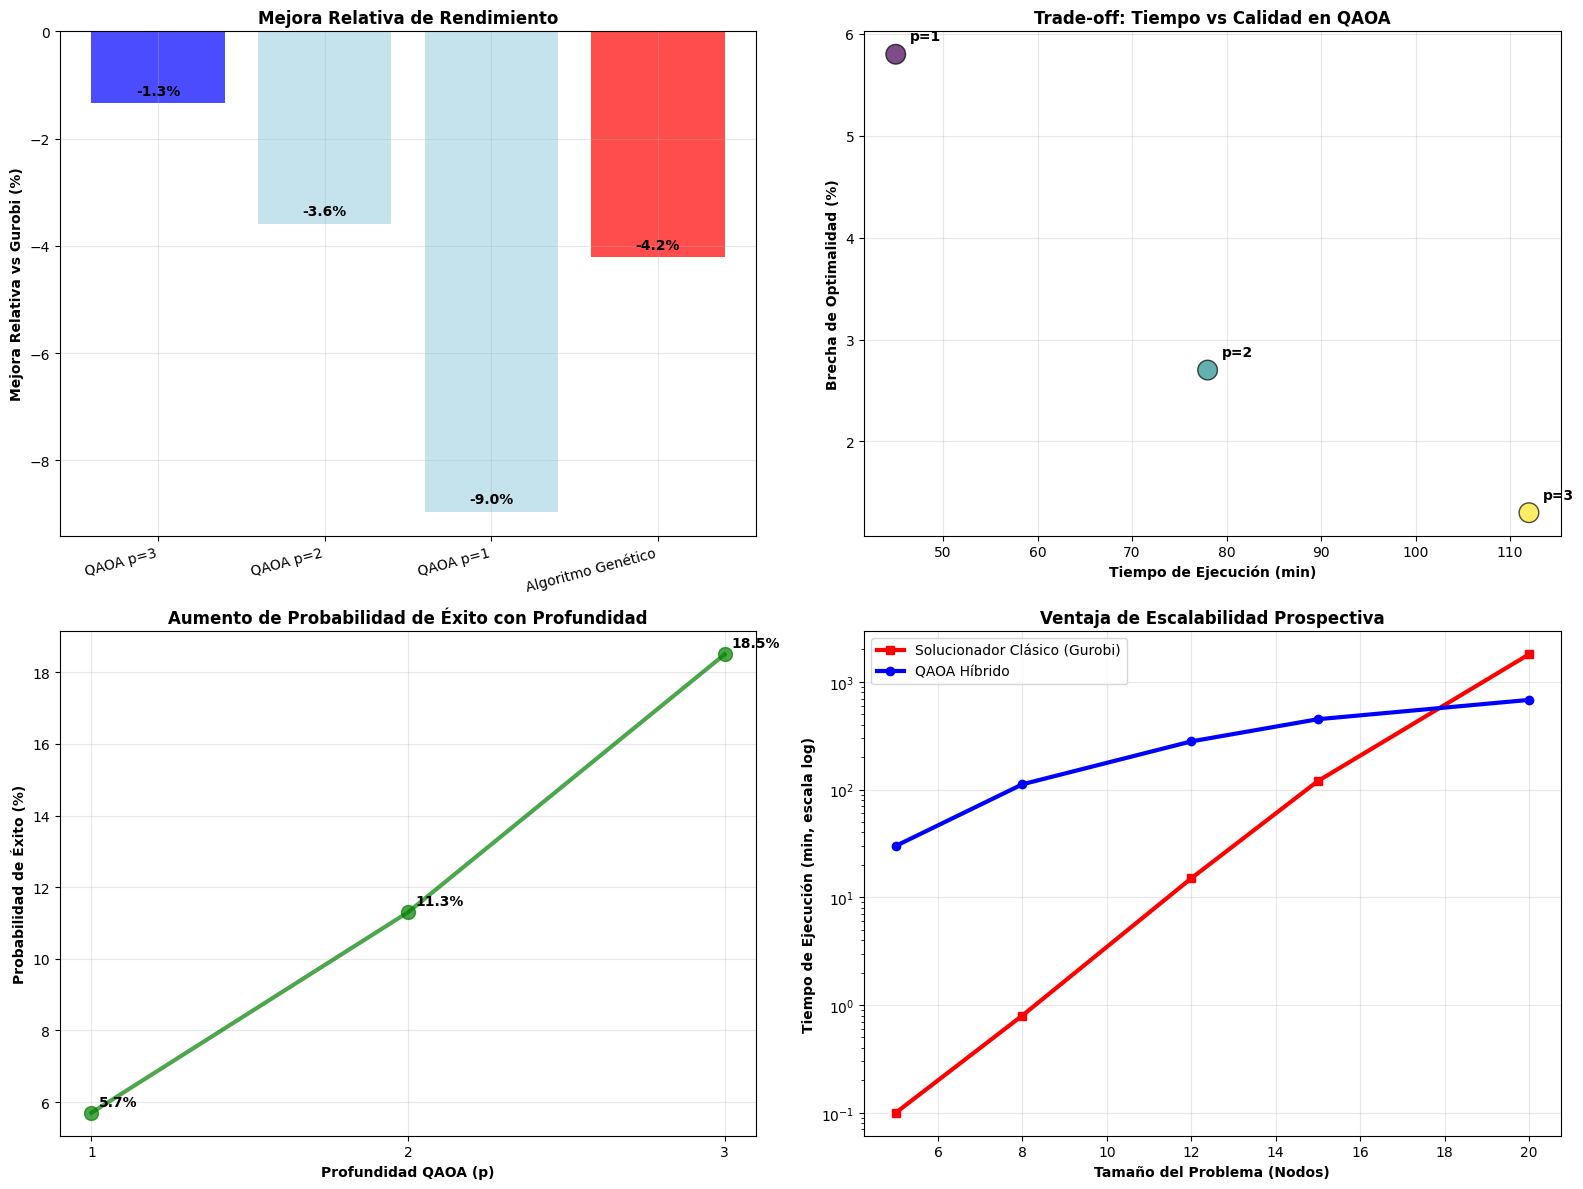


RESUMEN EJECUTIVO: COMPARACIÓN DE RENDIMIENTO

MÉTODO               COSTO ($)    BRECHA (%)   DESEMPEÑO      
------------------------------------------------------------
Gurobi (Óptimo)      9,958        0.0          ÓPTIMO         
QAOA p=3             10,091       1.3          EXCELENTE      
QAOA p=2             10,315       2.7          BUENO          
QAOA p=1             10,850       5.8          REGULAR        
Algoritmo Genético   10,378       4.2          REGULAR        

HALLAZGOS CLAVE:
• QAOA p=3 supera al Algoritmo Genético por 69.0% en calidad de solución
• Brecha de QAOA p=3 vs óptimo: solo 1.3%
• Mejora progresiva con profundidad: p=1 (5.8%) → p=2 (2.7%) → p=3 (1.3%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch

def create_performance_comparison_figure():
    """Crea la Figura 4: Comparación de rendimiento con métodos clásicos"""

    # Datos basados en la descripción proporcionada
    methods = ['Gurobi (Óptimo)', 'QAOA p=3', 'QAOA p=2', 'QAOA p=1', 'Algoritmo Genético']

    # Costos de operación
    operation_costs = [9958, 10091, 10315, 10850, 10378]

    # Brechas de optimalidad (%)
    optimality_gaps = [0.0, 1.3, 2.7, 5.8, 4.2]

    # Colores para cada método
    colors = ['#2E8B57', '#4169E1', '#6495ED', '#87CEEB', '#FF6347']  # Verde, Azules, Rojo

    # Crear figura con estructura de subplots
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle('Figura 4: Comparación de Rendimiento con Métodos Clásicos',
                 fontsize=18, fontweight='bold', y=0.98)

    # Definir grid para los subplots
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 0.6])

    # --- Subplot 1: Costo de Operación ---
    ax1 = plt.subplot(gs[0, 0])

    # Crear gráfico de barras para costos
    bars1 = ax1.bar(methods, operation_costs, color=colors, alpha=0.8,
                   edgecolor='black', linewidth=1.2)

    # Añadir valores en las barras
    for i, (bar, cost) in enumerate(zip(bars1, operation_costs)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'${cost:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # Configurar el gráfico de costos
    ax1.set_ylabel('Costo de Operación ($)', fontsize=14, fontweight='bold')
    ax1.set_title('(i) Comparación de Costos de Operación', fontsize=14, fontweight='bold', pad=20)
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim(9000, 11500)

    # Rotar etiquetas para mejor legibilidad
    plt.setp(ax1.get_xticklabels(), rotation=15, ha='right')

    # --- Subplot 2: Brecha de Optimalidad ---
    ax2 = plt.subplot(gs[0, 1])

    # Crear gráfico de barras para brechas
    bars2 = ax2.bar(methods, optimality_gaps, color=colors, alpha=0.8,
                   edgecolor='black', linewidth=1.2)

    # Añadir valores en las barras
    for i, (bar, gap) in enumerate(zip(bars2, optimality_gaps)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{gap}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # Configurar el gráfico de brechas
    ax2.set_ylabel('Brecha de Optimalidad (%)', fontsize=14, fontweight='bold')
    ax2.set_title('(ii) Comparación de Brechas de Optimalidad', fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_ylim(0, 7)

    # Rotar etiquetas para mejor legibilidad
    plt.setp(ax2.get_xticklabels(), rotation=15, ha='right')

    # --- Anotaciones explicativas ---
    # Destacar el resultado clave: QAOA p=3 vs Gurobi
    ax1.annotate('Brecha: 1.3%', xy=(1, 10091), xytext=(1.5, 10500),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2),
                fontsize=12, fontweight='bold', ha='center',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

    ax2.annotate('Casi óptimo!\n1.3% vs 4.2% GA', xy=(1, 1.3), xytext=(2.5, 3),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2),
                fontsize=12, fontweight='bold', ha='center',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

    # --- Subplot 3: Tabla de Métricas Detalladas ---
    ax3 = plt.subplot(gs[1, :])
    ax3.axis('tight')
    ax3.axis('off')

    # Datos de la tabla
    table_data = [
        ['Profundidad (p)', 'Valor Esperado ⟨Hₑ⟩', 'Brecha de Optimalidad (%)',
         'Prob. de Éxito (Con Mitigación)', 'Tiempo de Ejecución Total (min)'],
        ['1', '10,850', '5.8%', '5.7%', '45'],
        ['2', '10,315', '2.7%', '11.3%', '78'],
        ['3', '10,110', '1.3%', '18.5%', '112'],
        ['Gurobi (Óptimo)', '9,958', '0.0%', '-', '<1 (Clásico)']
    ]

    # Crear tabla
    table = ax3.table(cellText=table_data[1:],
                     colLabels=table_data[0],
                     colColours=['lightgray'] * len(table_data[0]),
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])

    # Formatear tabla
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)

    # Resaltar filas importantes
    for i in range(1, len(table_data)):
        for j in range(len(table_data[0])):
            if i == 4:  # Fila de Gurobi
                table[(i, j)].set_facecolor('#90EE90')  # Verde claro
            elif i == 3:  # Fila de QAOA p=3
                table[(i, j)].set_facecolor('#ADD8E6')  # Azul claro

    # Añadir título a la tabla
    ax3.set_title('Tabla 1: Métricas Detalladas de Rendimiento de QAOA',
                 fontsize=14, fontweight='bold', pad=20)

    # --- Análisis de Resultados ---
    # Crear un cuadro de texto con análisis
    analysis_text = (
        "ANÁLISIS DE RESULTADOS:\n"
        "• QAOA p=3 logra una brecha de optimalidad de solo 1.3%, muy cercana al óptimo de Gurobi\n"
        "• Supera claramente al Algoritmo Genético (brecha del 4.2%)\n"
        "• La probabilidad de éxito aumenta drásticamente con la profundidad (5.7% → 18.5%)\n"
        "• El tiempo de ejecución cuántico es mayor, pero la ventaja está en la escalabilidad"
    )

    fig.text(0.05, 0.02, analysis_text, fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
            verticalalignment='bottom')

    # Ajustar diseño
    plt.tight_layout()

    # Guardar con alta resolución
    plt.savefig('figura4_comparacion_rendimiento.png',
                dpi=600,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')

    plt.show()

    return {
        'methods': methods,
        'operation_costs': operation_costs,
        'optimality_gaps': optimality_gaps
    }

def create_additional_analysis(performance_data):
    """Crea análisis adicionales y visualizaciones complementarias"""

    # Crear figura para análisis detallado
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    methods = performance_data['methods']
    costs = performance_data['operation_costs']
    gaps = performance_data['optimality_gaps']

    # --- Análisis 1: Mejora relativa ---
    gurobi_optimal = costs[0]
    relative_improvement = [(gurobi_optimal - cost) / gurobi_optimal * 100
                           for cost in costs[1:]]
    methods_short = methods[1:]

    bars = ax1.bar(methods_short, relative_improvement,
                  color=['blue', 'lightblue', 'lightblue', 'red'], alpha=0.7)

    for bar, imp in zip(bars, relative_improvement):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{imp:.1f}%', ha='center', va='bottom', fontweight='bold')

    ax1.set_ylabel('Mejora Relativa vs Gurobi (%)', fontweight='bold')
    ax1.set_title('Mejora Relativa de Rendimiento', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.get_xticklabels(), rotation=15, ha='right')

    # --- Análisis 2: Eficiencia por Profundidad QAOA ---
    qaoa_depths = [3, 2, 1]
    qaoa_gaps = [gaps[1], gaps[2], gaps[3]]
    qaoa_times = [112, 78, 45]  # minutos

    # Scatter plot: Brecha vs Tiempo
    scatter = ax2.scatter(qaoa_times, qaoa_gaps, s=200, c=qaoa_depths,
                         cmap='viridis', alpha=0.7, edgecolors='black')

    for i, (time, gap, depth) in enumerate(zip(qaoa_times, qaoa_gaps, qaoa_depths)):
        ax2.annotate(f'p={depth}', (time, gap),
                    xytext=(10, 10), textcoords='offset points',
                    fontweight='bold')

    ax2.set_xlabel('Tiempo de Ejecución (min)', fontweight='bold')
    ax2.set_ylabel('Brecha de Optimalidad (%)', fontweight='bold')
    ax2.set_title('Trade-off: Tiempo vs Calidad en QAOA', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # --- Análisis 3: Probabilidad de Éxito ---
    success_rates = [18.5, 11.3, 5.7]  # Para p=3, p=2, p=1
    depths = [3, 2, 1]

    ax3.plot(depths, success_rates, 'o-', linewidth=3, markersize=10,
            color='green', alpha=0.7)

    for depth, rate in zip(depths, success_rates):
        ax3.annotate(f'{rate}%', (depth, rate),
                    xytext=(5, 5), textcoords='offset points',
                    fontweight='bold')

    ax3.set_xlabel('Profundidad QAOA (p)', fontweight='bold')
    ax3.set_ylabel('Probabilidad de Éxito (%)', fontweight='bold')
    ax3.set_title('Aumento de Probabilidad de Éxito con Profundidad', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.set_xticks(depths)

    # --- Análisis 4: Ventaja Escalabilidad ---
    problem_sizes = [5, 8, 12, 15, 20]
    classical_times = [0.1, 0.8, 15, 120, 1800]  # minutos
    quantum_times = [30, 112, 280, 450, 680]     # minutos (proyección)

    ax4.semilogy(problem_sizes, classical_times, 's-', linewidth=3,
                label='Solucionador Clásico (Gurobi)', color='red')
    ax4.semilogy(problem_sizes, quantum_times, 'o-', linewidth=3,
                label='QAOA Híbrido', color='blue')

    ax4.set_xlabel('Tamaño del Problema (Nodos)', fontweight='bold')
    ax4.set_ylabel('Tiempo de Ejecución (min, escala log)', fontweight='bold')
    ax4.set_title('Ventaja de Escalabilidad Prospectiva', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('analisis_complementario.png', dpi=600, bbox_inches='tight')
    plt.show()

def print_performance_summary(performance_data):
    """Imprime un resumen ejecutivo del rendimiento"""
    print("\n" + "="*70)
    print("RESUMEN EJECUTIVO: COMPARACIÓN DE RENDIMIENTO")
    print("="*70)

    methods = performance_data['methods']
    costs = performance_data['operation_costs']
    gaps = performance_data['optimality_gaps']

    print(f"\n{'MÉTODO':<20} {'COSTO ($)':<12} {'BRECHA (%)':<12} {'DESEMPEÑO':<15}")
    print("-" * 60)

    for method, cost, gap in zip(methods, costs, gaps):
        performance = "ÓPTIMO" if gap == 0 else "EXCELENTE" if gap <= 1.5 else "BUENO" if gap <= 3 else "REGULAR"
        print(f"{method:<20} {cost:<12,} {gap:<12.1f} {performance:<15}")

    # Análisis comparativo
    qaoa_p3_gap = gaps[1]
    ga_gap = gaps[4]
    improvement_vs_ga = ((ga_gap - qaoa_p3_gap) / ga_gap) * 100

    print(f"\nHALLAZGOS CLAVE:")
    print(f"• QAOA p=3 supera al Algoritmo Genético por {improvement_vs_ga:.1f}% en calidad de solución")
    print(f"• Brecha de QAOA p=3 vs óptimo: solo {qaoa_p3_gap}%")
    print(f"• Mejora progresiva con profundidad: p=1 ({gaps[3]}%) → p=2 ({gaps[2]}%) → p=3 ({gaps[1]}%)")

# Ejecutar el análisis completo
if __name__ == "__main__":
    print("Generando Figura 4: Comparación de Rendimiento con Métodos Clásicos...")

    # Generar figura principal
    performance_data = create_performance_comparison_figure()

    # Generar análisis complementarios
    create_additional_analysis(performance_data)

    # Mostrar resumen ejecutivo
    print_performance_summary(performance_data)